# "Lasso"
> "My reference notebook about the lasso."

- author: Christopher Thiemann
- toc: true
- branch: master
- badges: true
- comments: true
- categories: [statistics, machine learning. regularization]
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2
- image: images/lasso_solution_path.png

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import gif
from itertools import cycle
import seaborn as sns
sns.set()

# Motivation/Intuition
Sometimes you are in a situation where you want to fit a linear model, say a linear regression

$y_i=\beta_0+\beta_1 x_{i1}+...+\beta_p x_{ip} + \varepsilon_i$

where $\varepsilon_i$ is the error term and with $N$ observations and $p$ variables but you have much more variables than observations $p >> N$. In this case the OLS-Estimaotr for $\beta$ is not unuqiue. TO see this consider the case where $N=p$ then $y$ lives in the same spaces spanned by the columns of $X$ (assuming no linear dependens) then the orthorgonal projection of OLS is not unqiue.

One way of dealing with this problem is to add regularization to the model. Here we will take a look at the LASSO. (Most of the folowwing information comes from {% cite sparsity %} and what I can remember from lectures I took.)

The lasso estimator is the solution to the following problem

$\hat{\beta}_{Lasso} = argmin_{\beta \in R^p} \frac{1}{2 N}||Y-X\beta||_2^2 + \lambda ||\beta||_1$

The idea behind this type of penalization is that the first term wants to choose $\beta$ such that it best fits to the data. The second term wants to set $\beta = $. So there are two forces workking against each other. $\lambda$ controls how expensice it is to have non zero coeficients in the model. For $\lambda = 0$ the above reduces to the regular OLS estimator. If $\lambda -> \infty$ then $\beta -> 0$. More intuitipon can be drawn by looking at the *primal* problem (the former is called the *dual* or *lagrangian* form)

$||Y-X\beta||_2^2 \ \ \ $ s.t. $\ \ \ ||\beta||_1 \leq R $

so we want the beta which best fits to the data but we only have a *budget* to spend on non zero coefificnts. Note the inverse inerprtaion of $R$ and $\lambda$. While an increasing$R$ allows for more zeros to be non zero it is the opposite for $\lambda$.

When I first saw this, with my ecponomics backgroud this reminewd me of the household problem of aximzing utily of consuming two goods given a budget constraint





## Not differentiable at 0

this poses a challenge since the last term cointains absolute value functions which are not differentiable at $0$ in other words we can't find a unique tangent line the point (0, 0).

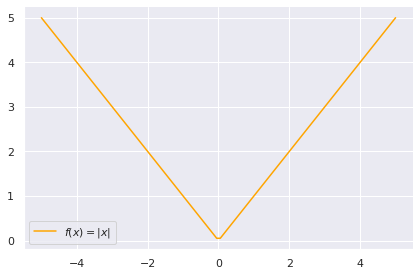

In [ ]:
fig, axes = plt.subplots(tight_layout = True)

x = np.linspace(-5, 5, 100)
y = np.abs(x)
sns.despine(fig)
axes.plot(x, y, color = 'orange', label = r"$f(x)=|x|$")
plt.legend();

## Introducing subgradients
Fortunatly for convex function we can extend the notion of a derivative. But first lets have a look at the derivate of the absolute function where we can compute it.

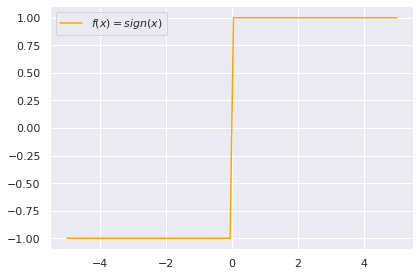

In [ ]:
fig, axes = plt.subplots(tight_layout = True)

x = np.linspace(-5, 5, 100)
y = np.sign(x)
sns.despine(fig)
axes.plot(x, y, color = 'orange', label = r'$f(x)=sign(x)$')
plt.legend();


We see that for $x<0$ the derivative is simply $-1$ and for $x>0$ it is $1$.

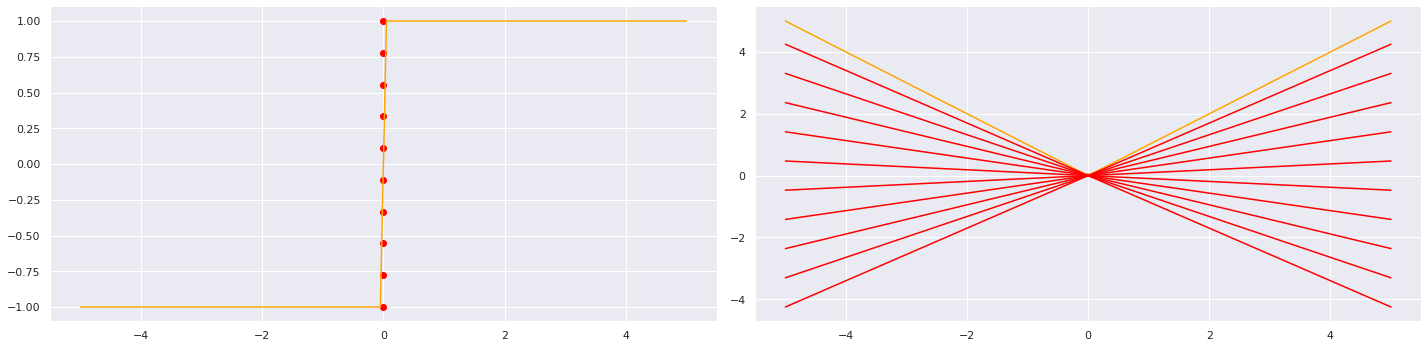

In [ ]:
fig, axes = plt.subplots(1, 2, tight_layout = True, figsize = (20, 5))

num_tangents = 10

x = np.linspace(-5, 5, 100)
y = np.sign(x)
axes[0].scatter(np.zeros(num_tangents), np.linspace(-1, 1, num_tangents), color = 'red')
sns.despine(fig)
axes[0].plot(x, y, color = 'orange');

y = np.abs(x)

axes[1].plot(x, y, color = 'orange');

for i in np.linspace(-.85, .85, num_tangents):

  axes[1].plot(x, x * i, color = 'red')




Note that all th red points in the left plot correspond to *a* tangent of the absolute value function.

Not surprisingly is the derivative -1 for $x < 0$ and $1$ for $x > 0$ and we also see the problematic part at $x=0$ The idea now is to define the *subgradient* of the absolute function at the point $x=0$ to be the whole interval $[-1, 1]$.

Now instead of carachertising the interior arg min/max of a continious function $f$ by requrinign $f'(x^*)=0$. We now have optimality conditions depending of the value of $x^*$.

Going bback to our opjective function (assuming one variable $p=1$) we first write down the optimality condition for $\beta <0$

$\frac{1}{N} \sum_i y_i x_i + \frac{1}{N} \sum_i x_i^2 \beta - \lambda = 0$

wlog assume that the data has been standadize in other weords $\bar{x} = 0$ and $\frac{1}{N} \sum_i (x_i - \bar{x})^2 = 1$ and hence $\sum_i x_i^2=N$ hence if $\beta < 0$ the opimality onditoipn is given by 

$\beta = \frac{1}{N} \sum_i y_i x_i - \lambda$

further we see that this holds if $\frac{1}{N} \sum_i y_i x_i > \lambda$ similarly we get for $\beta > 0$ 

$\beta = \frac{1}{N} \sum_i y_i x_i + \lambda$ if $\frac{1}{N} \sum y_i x_i < - \lambda$

In [ ]:
beta = np.concatenate([np.zeros(1000), np.random.randn(10)])

X = np.random.randn(200, 1010)

Y = X @ beta + np.random.randn(200)

In [ ]:
beta = np.concatenate([np.zeros(100), np.random.randn(10)])
np.random.shuffle(beta)

X = np.random.randn(200, 110)

Y = X @ beta + np.random.randn(200)

beta_est = np.random.randn(110)

lam =1


@gif.frame
def my_func(i):
    

    
    fig, axes = plt.subplots(figsize = (20, 10), tight_layout = True)
    
    axes.plot(np.arange(0, 110), beta_est, 'o', c = 'black')

    axes.set_xlim([0, 112])
    axes.set_ylim([-2, 2])
    
    
    
    
frames = []
for i in cycle(range(0, 110)):

    if i == 0:

        beta_compare = beta_est.copy()

    beta_est[i] = soft_threshold_v2(beta_est[i] + 1 / 200 * np.dot(X[:, i], Y - X @ beta_est))

    #if coef got shrunken to zero then there is no need to add new plot -> more efficient
    #if beta_compare[i] != 0:
      #frame = my_func(i)
      #frames.append(frame)

    if i == 109:

        print(np.sum(np.abs(beta_compare - beta_est)))

        
        
        

        if np.sum(np.abs(beta_compare - beta_est)) < 0.000005:



            break
                
#gif.save(frames, "sine-wave.gif", duration = 400)

80.41851791699224
3.719620494243619
0.10894752126920282
0.009869280039495498
0.0016161137884975751
0.0002981119462510673
5.443332251031663e-05
9.958000201537587e-06
1.8216235886381327e-06


## Comparison with sklearn's lasso implementation

Lets see if our algorithm does the same as sklearn

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha = 1, fit_intercept=False).fit(X, Y)
beta_my = lasso_solver(Y, X, 1)
np.allclose(model.coef_, beta_my)


True

In [ ]:
beta_my

array([0.        , 0.        , 0.        , ..., 0.21234333, 0.26944748,
       0.81253398])

## Example o finding a minumum of a non differentiable convex function
Example lets find the minimum of $(x -1) ^2 + |x|$

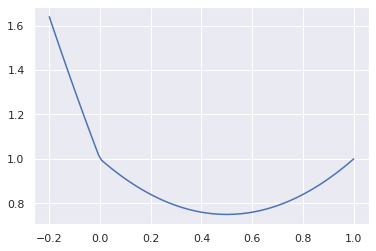

In [ ]:
x = np.linspace(-.2, 1, 100)
plt.plot(x, (x - 1) ** 2 + np.abs(x));

Note the non differentiable point (kink) at $x=0$ and that by visual inspection we see that the minmum is at $x=0.5$

The derivative is given by 

$2x - 2 + sign(x)$

Lets investigate now, maybe the minum is at a point where $x < 0$ ? If so it has to hold that $2x - 2- 1=0 -> x = \frac{2}{3}$ which is a contradiction to our assumption that $x<0$.

What about $x=0$ ? Our subgradient takes on values in $[2x - 3, 2x - 1]$. Is a tangent with slope 0 in this intervall ? Clrearly not since the above is equvalent to $\frac{1}{2} <= x <= \frac{3}{2}$ which contradicts our assumption that the min is at $x=0$.

So the last case is $x>0$ which translates to $2x - 1 = 0 -> x = \frac{1}{2} > 0$ given the observed minimum.

(-4.0, 1.0)

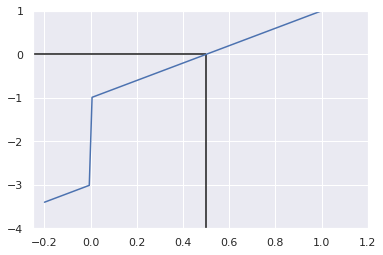

In [ ]:
x = np.linspace(-.2, 1, 100)
plt.plot(x, 2 * x - 2 + np.sign(x))

plt.vlines(.5, -4, 0)
plt.hlines(0, -.25, .5)

plt.xlim([-.25, 1.2])
plt.ylim([-4, 1])

# utility budget constarint

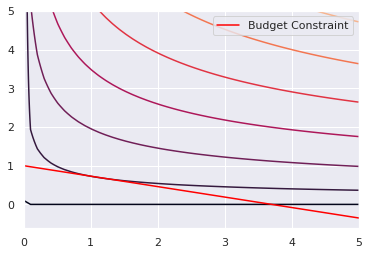

In [ ]:
fig, axes = plt.subplots()

x_1 = np.linspace(0, 5)
x_2 = np.linspace(0,5)

X_1, X_2 = np.meshgrid(x_1, x_2)



Z_1 = budget(np.linspace(0, 1 / 2))

Z = util(X_1, X_2)
plt.plot(x_1, Z_1, label = 'Budget Constraint', c = 'red')
plt.contour(X_1, X_2, Z)
plt.legend()

## plot if soft thresholding operator

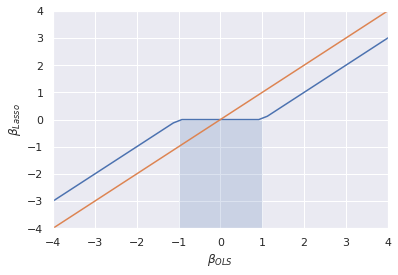

In [ ]:
lam = 1
YY = [soft_threshold_v2(i) for i in np.linspace(-5,5)]
fig, axes = plt.subplots()

axes.set_ylabel(r"$\beta_{Lasso}$")
axes.set_xlabel(r"$\beta_{OLS}$")
plt.plot(np.linspace(-5,5), YY)
plt.plot([-4, 4], [-4, 4])
axes.set_xlim([-4, 4])
axes.set_ylim([-4, 4])
axes.fill_between([-1, 1], [-4, -4], alpha = .2)
plt.show()

# lasso as constraint problem

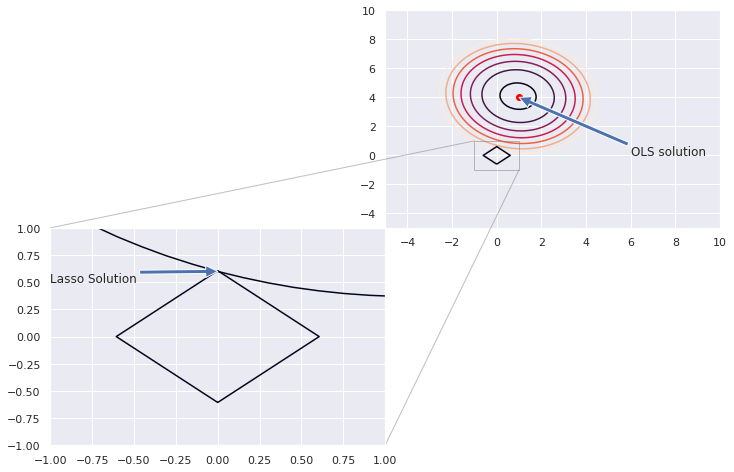

In [ ]:

# generate data
np.random.seed(123)
beta = np.array([4, 1])
X = np.random.randn(100, 2)
y = X @ beta + np.random.randn(100)


grid = np.linspace(-5, 10, 100)
XX, YY = np.meshgrid(grid, grid)

# computations
ll = []
lasso_list = []
for i in grid:

  for j in grid:

    ll.append(ols_constraint(i, j))
    lasso_list.append(lasso_constraint(i, j))

DD = np.array(ll).reshape(100, 100)
ZZ = np.array(lasso_list).reshape(100, 100)



# plotting
fig, axes = plt.subplots()
AA = DD.flatten()
AA.sort()
# big plot
axes.contour(XX, YY, DD, AA[np.arange(100, 2000, 300)])
axes.contour(XX, YY, ZZ, lasso_constraint(grid, grid)[35:36])
axes.annotate('OLS solution', [1, 4], [6, 0], arrowprops = {})
axes.scatter(1, 4, c = 'red')

# small plot
axins = axes.inset_axes([-1, -1, 1, 1])
axins.contour(XX, YY, ZZ, lasso_constraint(grid, grid)[35:36])

axins.annotate("Lasso Solution", [0, 0.6], [-1, .5], arrowprops = {})

axins.contour(XX, YY, DD, AA[1690:1691])
axins.set_xlim([-1, 1])
axins.set_ylim([-1, 1])
axes.indicate_inset_zoom(axins);

# Solution Path

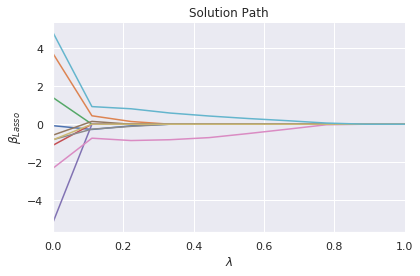

In [4]:
np.random.seed(123)

num_coef = 50
X = np.random.randn(50, num_coef)

beta = np.random.randn(num_coef)

y = X @ beta + np.random.randn(50)

beta_list = []

grid = np.linspace(0, 1, 10)

beta_estimate = np.random.randn(num_coef)
aaa = np.random.randn(num_coef).reshape(-1, 1)
for i, lam in enumerate(grid):

  beta_estimate = lasso_solver(y, X, lam, beta_estimate)

  aaa = np.append(aaa, beta_estimate.reshape(-1, 1), axis = 1)

#ols_sol = lasso_solver(y, X, 0)

  #plt.xscale("log")

#plt.hlines(0, 0, 1)

fig, axes = plt.subplots(tight_layout = True)
bbb = aaa[:, 1:]
for i in range(10):

  axes.plot(grid, bbb[i, :])

  sns.despine(fig)
  axes.set_xlabel(r"$\lambda$")
  axes.set_ylabel(r"$\beta_{Lasso}$")
  axes.set_xlim([0, 1])
  axes.set_title("Solution Path")
    
plt.savefig("lasso_solution_path.png")


# Helper Functions

In [2]:
def lasso_constraint(beta1, beta2):

  return np.abs(beta1) + np.abs(beta2)

def ols_constraint(beta_1, beta_2):

  beta11 = np.array([beta_1, beta_2])

  return 1 / 100 * (np.sum((y - X @ beta11) ** 2))



def util(x, y):

  return x ** 0.3 * y ** 0.7


def budget(x):

  return - 2.7 * x + 1


def lasso_solver(y, X, lambda_param, warm_start = False):

  p = X.shape[1]

  N = X.shape[0]

  if isinstance(warm_start, np.ndarray):
    beta_est = warm_start  
  else:
     beta_est = np.random.randn(p)


  for i in cycle(range(0, p)):
      
      if i == 0:
      
          beta_compare = beta_est.copy()
      
      beta_est[i] = soft_threshold_v2(beta_est[i] + 1 / N * np.dot(X[:, i], y - X @ beta_est), lambda_param)
      
          
      if i == p - 1:
                    
          if np.sum(np.abs(beta_compare - beta_est)) < 0.000005:
          
              return beta_est



def soft_threshold_v2(x, lambda_param):
    
    return np.sign(x) * (np.abs(x) - lambda_param) if (np.abs(x) - lambda_param) > 0 else 0

In [ ]:
type(np.random.randn(4))

numpy.ndarray

In [ ]:
np.random.randn(4)

array([-0.60898206,  0.4678057 ,  1.1568392 ,  0.31981346])

{% bibliography --cited %}